In [3]:
!pip install pandas
!pip install xlrd
!pip install sklearn
!pip install imblearn

In [1]:
import xlrd
book = xlrd.open_workbook("Datasheets info.xlsx")
sheetMQ2 = book.sheet_by_name("MQ2 - Pololulu")
sheetMQ3 = book.sheet_by_name("MQ3 - Sparkfun")
sheetMQ4 = book.sheet_by_name("MQ4 - Sparkfun")
sheetMQ5 = book.sheet_by_name("MQ5 - Sparkfun")
sheetMQ6 = book.sheet_by_name("MQ6 - Sparkfun")
sheetMQ7 = book.sheet_by_name("MQ7 - Sparkfun")
sheetMQ8 = book.sheet_by_name("MQ8 - Sparkfun")
sheetMQ9 = book.sheet_by_name("MQ9 - Haoyuelectronics")
sheetMQ131 = book.sheet_by_name("MQ131- Sensorsportal")
sheetMQ135 = book.sheet_by_name("MQ135 - HANWEI")
sheetMQ303A = book.sheet_by_name("MQ303A - HANWEI")
sheetMQ309A = book.sheet_by_name("MQ309A - HANWEI")

In [2]:
for row_index in range(1,20): #reading first columns
    RsR0, Nox, CL2, O3 = sheetMQ131.row_values(row_index, start_colx=0, end_colx=4)
    print(RsR0, "	", Nox, "	", CL2, "	", O3)
 

0.1 	  	  	 
0.2 	  	  	 
0.3 	  	  	 
0.4 	  	  	 
0.5 	  	  	 100.0
0.6 	  	  	 
0.7 	  	  	 
0.8 	  	  	 
0.9 	  	  	 
1.0 	  	 50.0 	 
2.0 	  	  	 20.0
3.0 	 100.0 	  	 
4.0 	  	  	 
5.0 	  	  	 
6.0 	  	 10.0 	 5.0
7.0 	 10.0 	  	 
8.0 	  	 5.0 	 
9.0 	 5.0 	  	 
10.0 	  	  	 


In [3]:
x_MQ131 = sheetMQ131.col_values(0)[2:]
MQ131_Nox = sheetMQ131.col_values(1)[2:]
MQ131_CL2 = sheetMQ131.col_values(2)[2:]
MQ131_O3 = sheetMQ131.col_values(3)[2:]

In [4]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [5]:
MQ131_Nox =zero_to_nan(MQ131_Nox)
MQ131_CL2 =zero_to_nan(MQ131_CL2)
MQ131_O3 =zero_to_nan(MQ131_O3)

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import linear_model

dataNox = {'RsRo': x_MQ131, 'Nox': MQ131_Nox}
dataCL2 = {'RsRo': x_MQ131, 'CL2': MQ131_CL2}
dataO3 = {'RsRo': x_MQ131, 'O3': MQ131_O3}

dfMQ131_Nox = pd.DataFrame(dataNox)
dfMQ131_CL2 = pd.DataFrame(dataCL2)
dfMQ131_O3 = pd.DataFrame(dataO3)

dfMQ131_Nox['Nox'] = pd.to_numeric(dfMQ131_Nox['Nox'])
dfMQ131_CL2['CL2'] = pd.to_numeric(dfMQ131_CL2['CL2'])
dfMQ131_O3['O3'] = pd.to_numeric(dfMQ131_O3['O3'])

dfMQ131_Nox['Nox'] = dfMQ131_Nox['Nox'].replace('',None, regex=True)
dfMQ131_CL2['CL2'] = dfMQ131_CL2['CL2'].replace('',None, regex=True)
dfMQ131_O3['O3'] = dfMQ131_O3['O3'].replace('',None, regex=True)

#Global X_Predict variable
X_Predict = dfMQ131_Nox.RsRo.apply(lambda x: [x]).tolist()

In [11]:
#Model and train Nox
dataset2TrainNox = dfMQ131_Nox.copy()
dataset2TrainNox.dropna(inplace=True)
X_trainNox = dataset2TrainNox.RsRo.apply(lambda x: [x]).tolist()
y_trainNox = dataset2TrainNox['Nox'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainNox, y_trainNox)
#Predict
Nox_Predicted = model.predict(X_Predict)
#save into MQ2
MQ131_Nox = Nox_Predicted

In [12]:
#Model and train CL2
dataset2TrainCL2 = dfMQ131_CL2.copy()
dataset2TrainCL2.dropna(inplace=True)
X_trainCL2 = dataset2TrainCL2.RsRo.apply(lambda x: [x]).tolist()
y_trainCL2 = dataset2TrainCL2['CL2'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainCL2, y_trainCL2)
#Predict
CL2_Predicted = model.predict(X_Predict)
#save into MQ2
MQ131_CL2 = CL2_Predicted

In [13]:
#Model and train O3
dataset2TrainO3 = dfMQ131_O3.copy()
dataset2TrainO3.dropna(inplace=True)
X_trainO3 = dataset2TrainO3.RsRo.apply(lambda x: [x]).tolist()
y_trainO3 = dataset2TrainO3['O3'].tolist()
model = linear_model.Lasso(alpha=0.1)
model.fit(X_trainO3, y_trainO3)
#Predict
O3_Predicted = model.predict(X_Predict)
#save into MQ2
MQ131_O3 = O3_Predicted

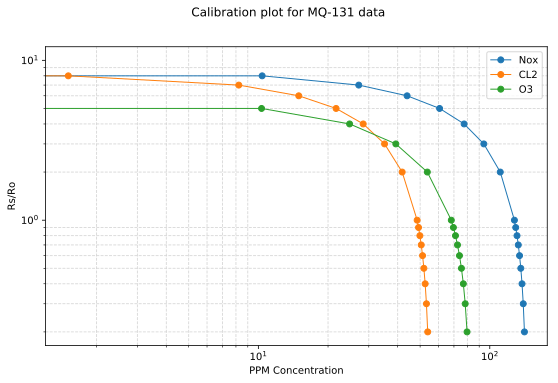

In [14]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(9, 5.5, forward=True)
fig.set_dpi(200)

# only these two lines are calibration curves
plt.plot(MQ131_Nox, x_MQ131, marker='o', linewidth=1, label='Nox')
plt.plot(MQ131_CL2, x_MQ131, marker='o', linewidth=1, label='CL2')
plt.plot(MQ131_O3, x_MQ131, marker='o', linewidth=1, label='O3')


# reference line, legends, and axis labels
#line = mlines.Line2D([0, 1], [0, 1], color='black')
#transform = ax.transAxes
#line.set_transform(transform)
#ax.add_line(line)
plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.grid(b=True, which='minor', color='lightgrey', linestyle='--')

fig.suptitle('Calibration plot for MQ-131 data')
ax.set_xlabel('PPM Concentration')
ax.set_ylabel('Rs/Ro')


#Save image
plt.savefig('MQ131.svg', format = 'svg', dpi = 1200)
plt.savefig('MQ131.png')
plt.savefig('MQ131.eps', format = 'eps', dpi = 1200)